# CO2 Emissions Analysis 
    

## Goal

The goal of this project is to identify the top countries responsible for CO2 emissions and determine the Caribbean region's impact on global emissions. By performing a data analysis using Python, this project aims to provide valuable insights that can help environmentalists, climate change activists, and policymakers better understand how emissions are produced globally and identify which activities play a crucial role in CO2 emissions. Additionally, it aims to show the negligible impact the Caribbean has on global CO2 emissions, despite experiencing substantial effects of climate change due to these emissions.

## Setup

**Importing the necessary libraries I will use for this project**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Reading in the data**

In [3]:
pd.options.display.float_format = '{:.2f}'.format
df1 = pd.read_csv('GCB2022v27_MtCO2_flat.csv')

**Data Inspectation** 

In [5]:
df1.head(10)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,AFG,1755,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,AFG,1756,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,AFG,1757,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,AFG,1758,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,AFG,1759,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df1.tail(10)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
63094,Global,WLD,2012,35006.27,14922.76,11541.71,6500.59,1384.57,380.35,276.29,4.89
63095,Global,WLD,2013,35319.20,15024.49,11626.45,6542.53,1444.09,387.54,294.12,4.87
63096,Global,WLD,2014,35577.53,15051.51,11678.78,6654.56,1499.91,387.90,304.87,4.85
63097,Global,WLD,2015,35558.57,14710.09,11929.67,6788.07,1444.44,383.53,302.77,4.79
63098,Global,WLD,2016,35524.19,14360.61,12023.83,6973.65,1487.62,378.39,300.10,4.73
63099,Global,WLD,2017,36096.74,14506.97,12242.63,7144.93,1507.92,391.99,302.29,4.75
63100,Global,WLD,2018,36826.51,14746.83,12266.02,7529.85,1569.22,412.12,302.48,4.79
63101,Global,WLD,2019,37082.56,14725.98,12345.65,7647.53,1617.51,439.25,306.64,4.78
63102,Global,WLD,2020,35264.09,14174.56,11191.81,7556.29,1637.54,407.58,296.30,4.50
63103,Global,WLD,2021,37123.85,14979.60,11837.16,7921.83,1672.59,416.53,296.15,4.69


In [7]:
df1.dtypes

Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Coal                  float64
Oil                   float64
Gas                   float64
Cement                float64
Flaring               float64
Other                 float64
Per Capita            float64
dtype: object

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


In [9]:
df1.describe()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,63104.00,62904.00,21744.00,21717.00,21618.00,20814.00,21550.00,1620.00,18974.00
mean,1885.50,55.22,73.97,55.76,23.50,4.33,1.71,10.95,4.41
std,78.52,824.85,598.99,519.03,247.67,50.31,16.73,39.03,17.43
min,1750.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1817.75,0.00,0.00,0.09,0.00,0.00,0.00,0.52,0.20
50%,1885.50,0.00,0.27,1.04,0.00,0.02,0.00,1.26,1.30
75%,1953.25,0.55,6.74,8.34,0.58,0.57,0.00,4.39,5.08
max,2021.00,37123.85,15051.51,12345.65,7921.83,1672.59,439.25,306.64,834.19


## Data Cleaning 

### Checking for missing data 

In [11]:
df1.isna().sum()

Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                   200
Coal                  41360
Oil                   41387
Gas                   41486
Cement                42290
Flaring               41554
Other                 61484
Per Capita            44130
dtype: int64

In [12]:
# Creating a copy of the dataset before manipulation 
co2 = df1.copy()

In [13]:
co2.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Christmas Island', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'North Korea', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
   

In [14]:
#Replacing NaN values with zero
co2 = df1.fillna(0)
co2

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Afghanistan,AFG,1751,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Afghanistan,AFG,1752,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Afghanistan,AFG,1753,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Afghanistan,AFG,1754,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.74,14506.97,12242.63,7144.93,1507.92,391.99,302.29,4.75
63100,Global,WLD,2018,36826.51,14746.83,12266.02,7529.85,1569.22,412.12,302.48,4.79
63101,Global,WLD,2019,37082.56,14725.98,12345.65,7647.53,1617.51,439.25,306.64,4.78
63102,Global,WLD,2020,35264.09,14174.56,11191.81,7556.29,1637.54,407.58,296.30,4.50


###  Removing records listed under Global and International Transport 

In [15]:
filtered_co2 = co2[~co2['Country'].isin(['Global', 'International Transport'])]

In [16]:
filtered_co2.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Christmas Island', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'North Korea', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
   

## Data Exploration and Visualization

### Who are the Top 10 CO2 Emittters ?

In [17]:
filtered_co2.groupby(['Country']).Total.sum().sort_values(ascending=False)[:10]

Country
USA              421906.86
China            249352.82
Russia           117547.63
Germany           93290.50
United Kingdom    78508.72
Japan             66711.08
India             57105.39
France            39105.76
Canada            34115.40
Ukraine           30784.73
Name: Total, dtype: float64

In [46]:
top_10_country_total = filtered_co2.groupby(['Country']).Total.sum().sort_values(ascending=False)[:10]

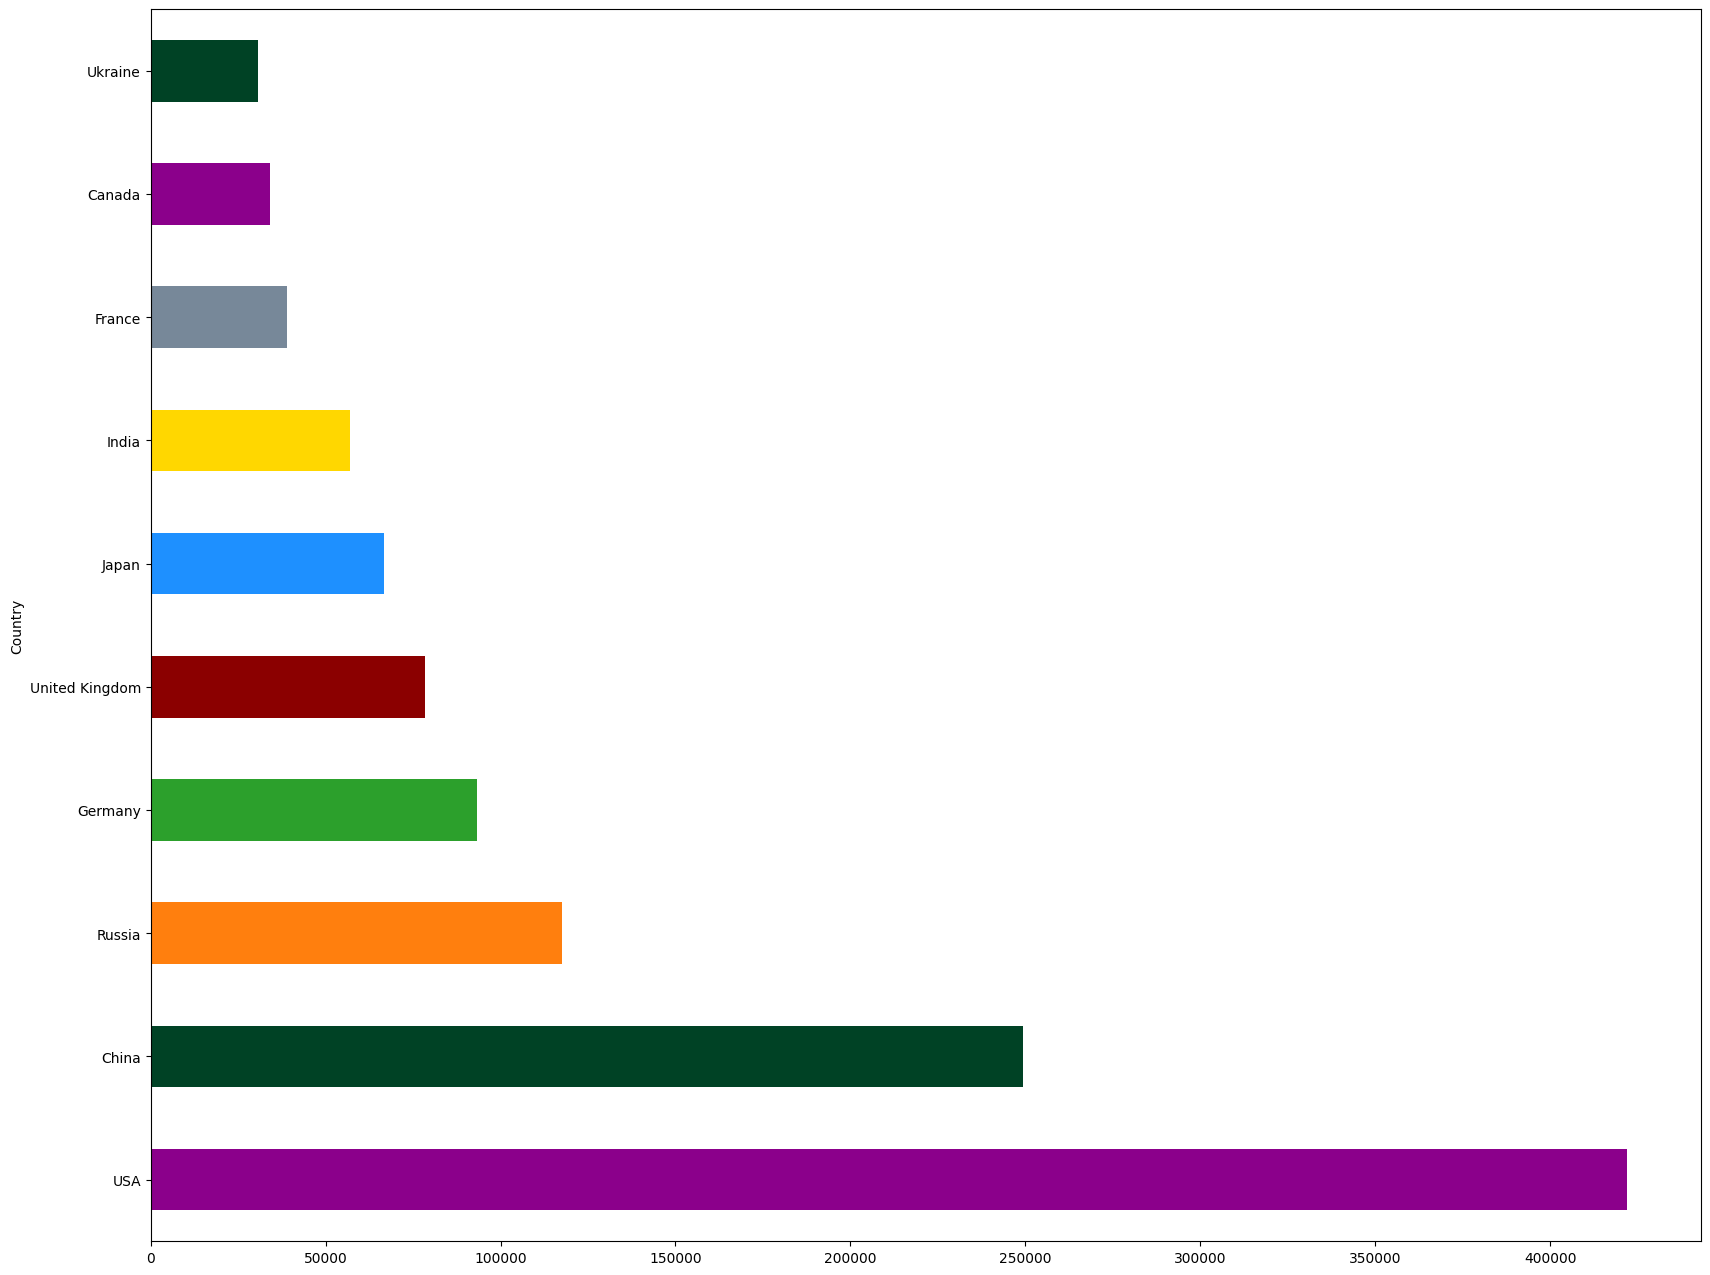

In [47]:
plt.figure(figsize=(20,16))
colors = ['#8B008B','#004225','#ff7f0e','#2ca02c','#8B0000','#1E90FF','#FFD700','#778899']
ax = top_10_country_total.plot.barh(color = colors)

### Who are The Top 10 emitters in the caribbean ?

In [61]:
caribbean_countries = filtered_co2[filtered_co2['Country'].isin([
    'Anguilla', 'Antigua and Barbuda', 'Aruba','Bahamas', 'Barbados',
    'Belize', 'Bermuda', 'British Virgin Islands', 'Cayman Islands', 'Cuba', 'Dominica',
    'Dominican Republic', 'Grenada', 'Guyana', 'Jamaica', 'Haiti',
    'Montserrat', 'Netherlands Antilles', 'Puerto Rico', 'St. Kitts and Nevis', 'Saint Lucia',
    'St. Vincent and the Grenadines', 'Suriname', 'Trinidad and Tobago', 'Turks and Caicos'
   
])]

caribbean_countries_total = caribbean_countries.groupby(['Country']).Total.sum().sort_values(ascending=False)[:10]

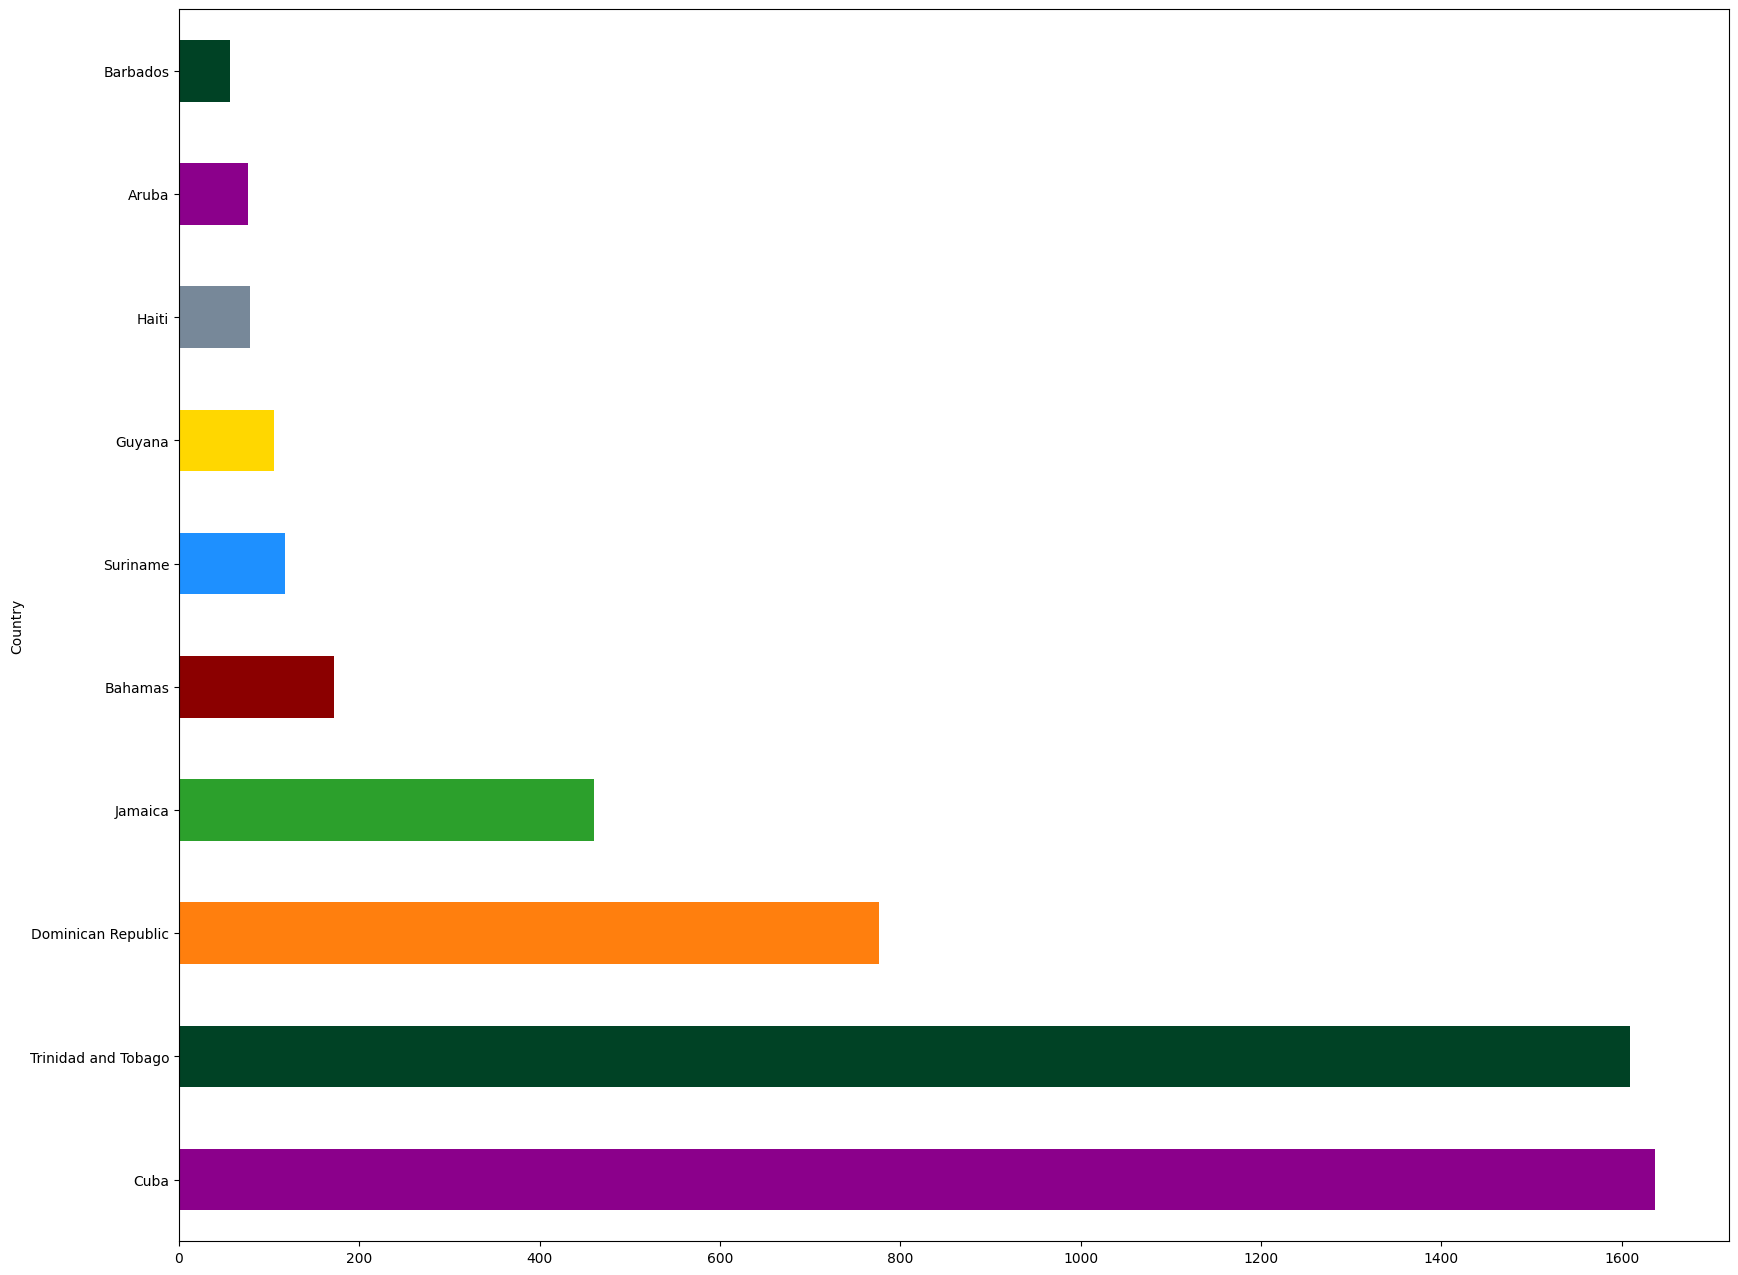

In [62]:
plt.figure(figsize=(20,16))
colors = ['#8B008B','#004225','#ff7f0e','#2ca02c','#8B0000','#1E90FF','#FFD700','#778899']
emissions_plot = caribbean_countries_total.plot.barh(color = colors)

 ### How has the top  10 countries emission change for the given timeframe (increassing/declining)?

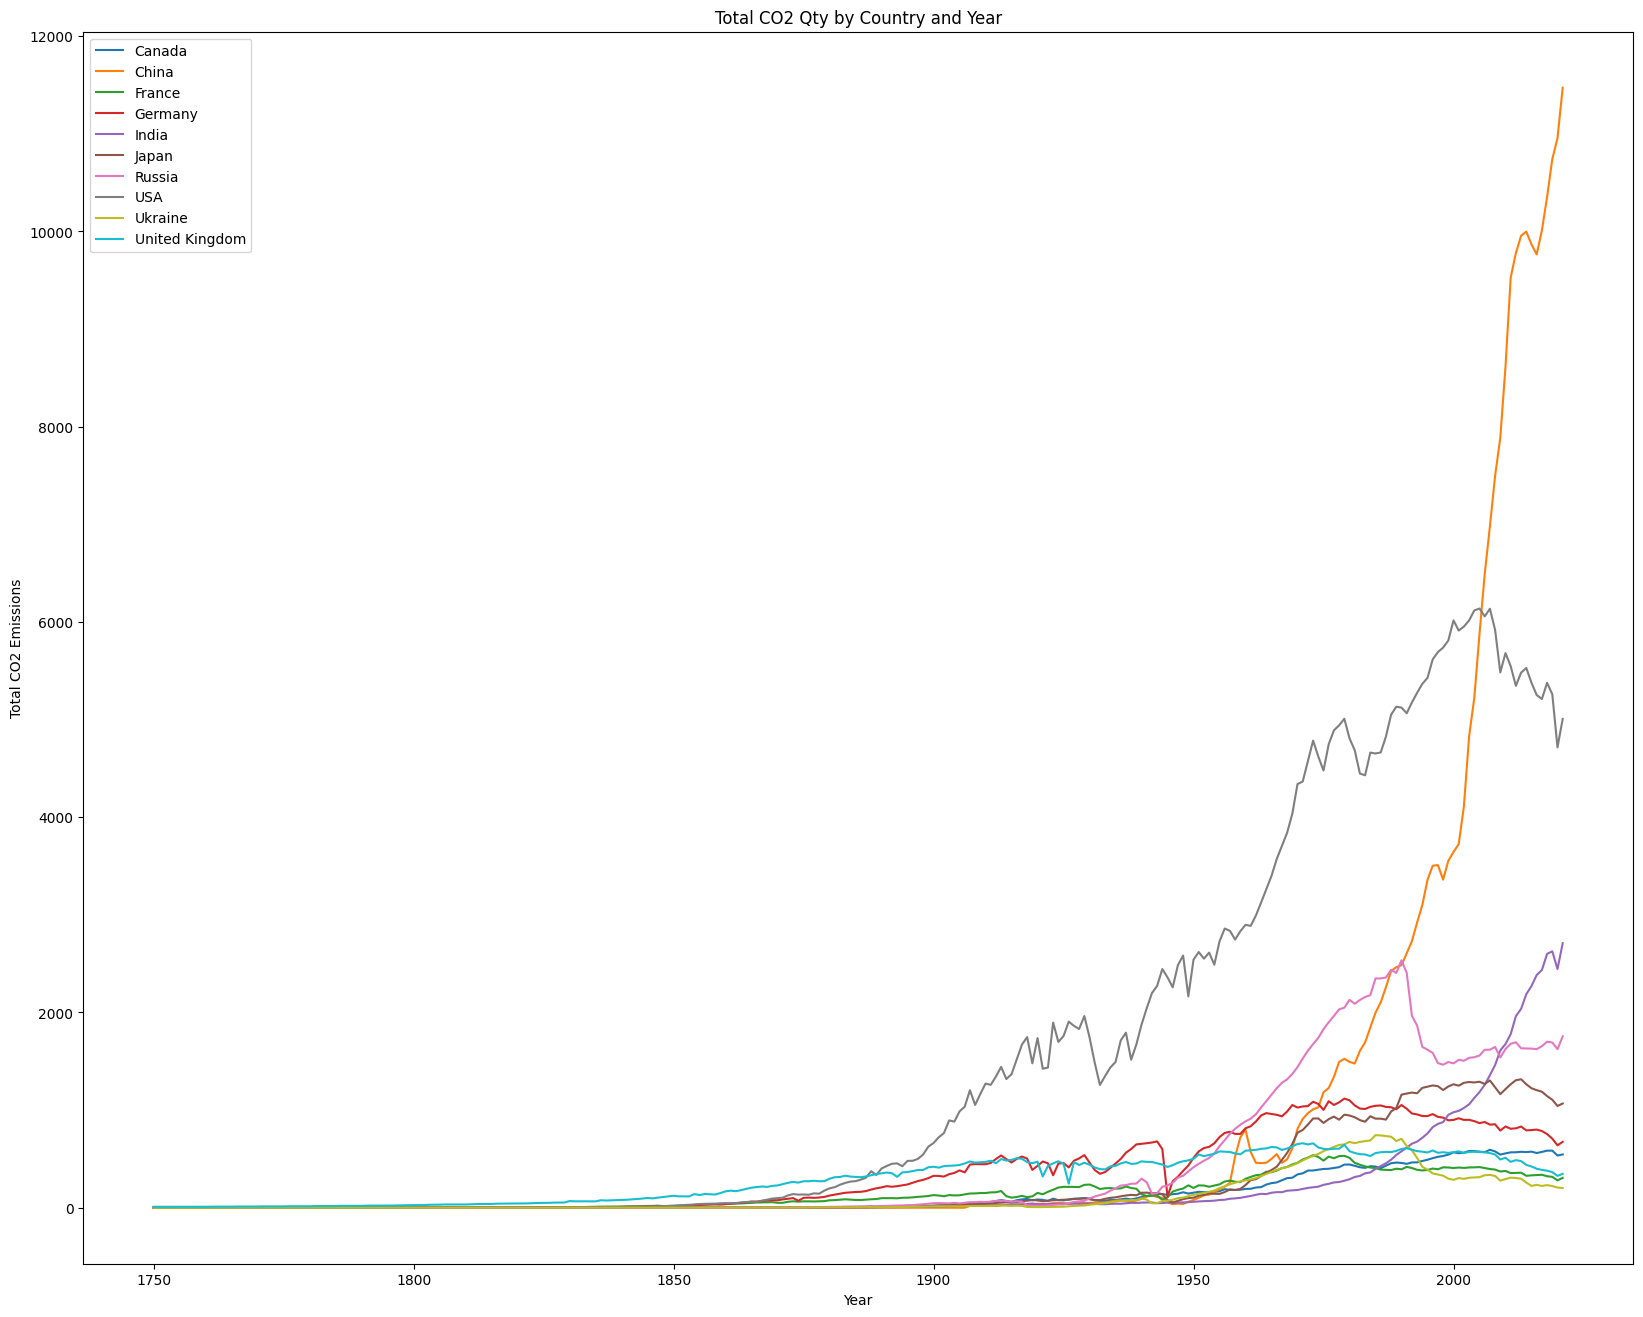

In [63]:
plt.figure(figsize=(20,16))
# create a DataFrame from the data

df = filtered_co2[filtered_co2['Country'].isin(['USA', 'China','Russia','Germany','United Kingdom','Japan','Ukraine','India','France','Canada'])]
# group the data by country
grouped = df.groupby("Country")

# plot the line graph for each country
for name, group in grouped:
    plt.plot(group['Year'], group['Total'], label=name)

# add a title, x-axis label, and y-axis label
plt.title('Total CO2 Qty by Country and Year')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions')

# add a legend
plt.legend()

# show the plot
plt.show()

 ### How has the  caribbean region CO2 emissions change for the given timeframe (increassing/declining)?

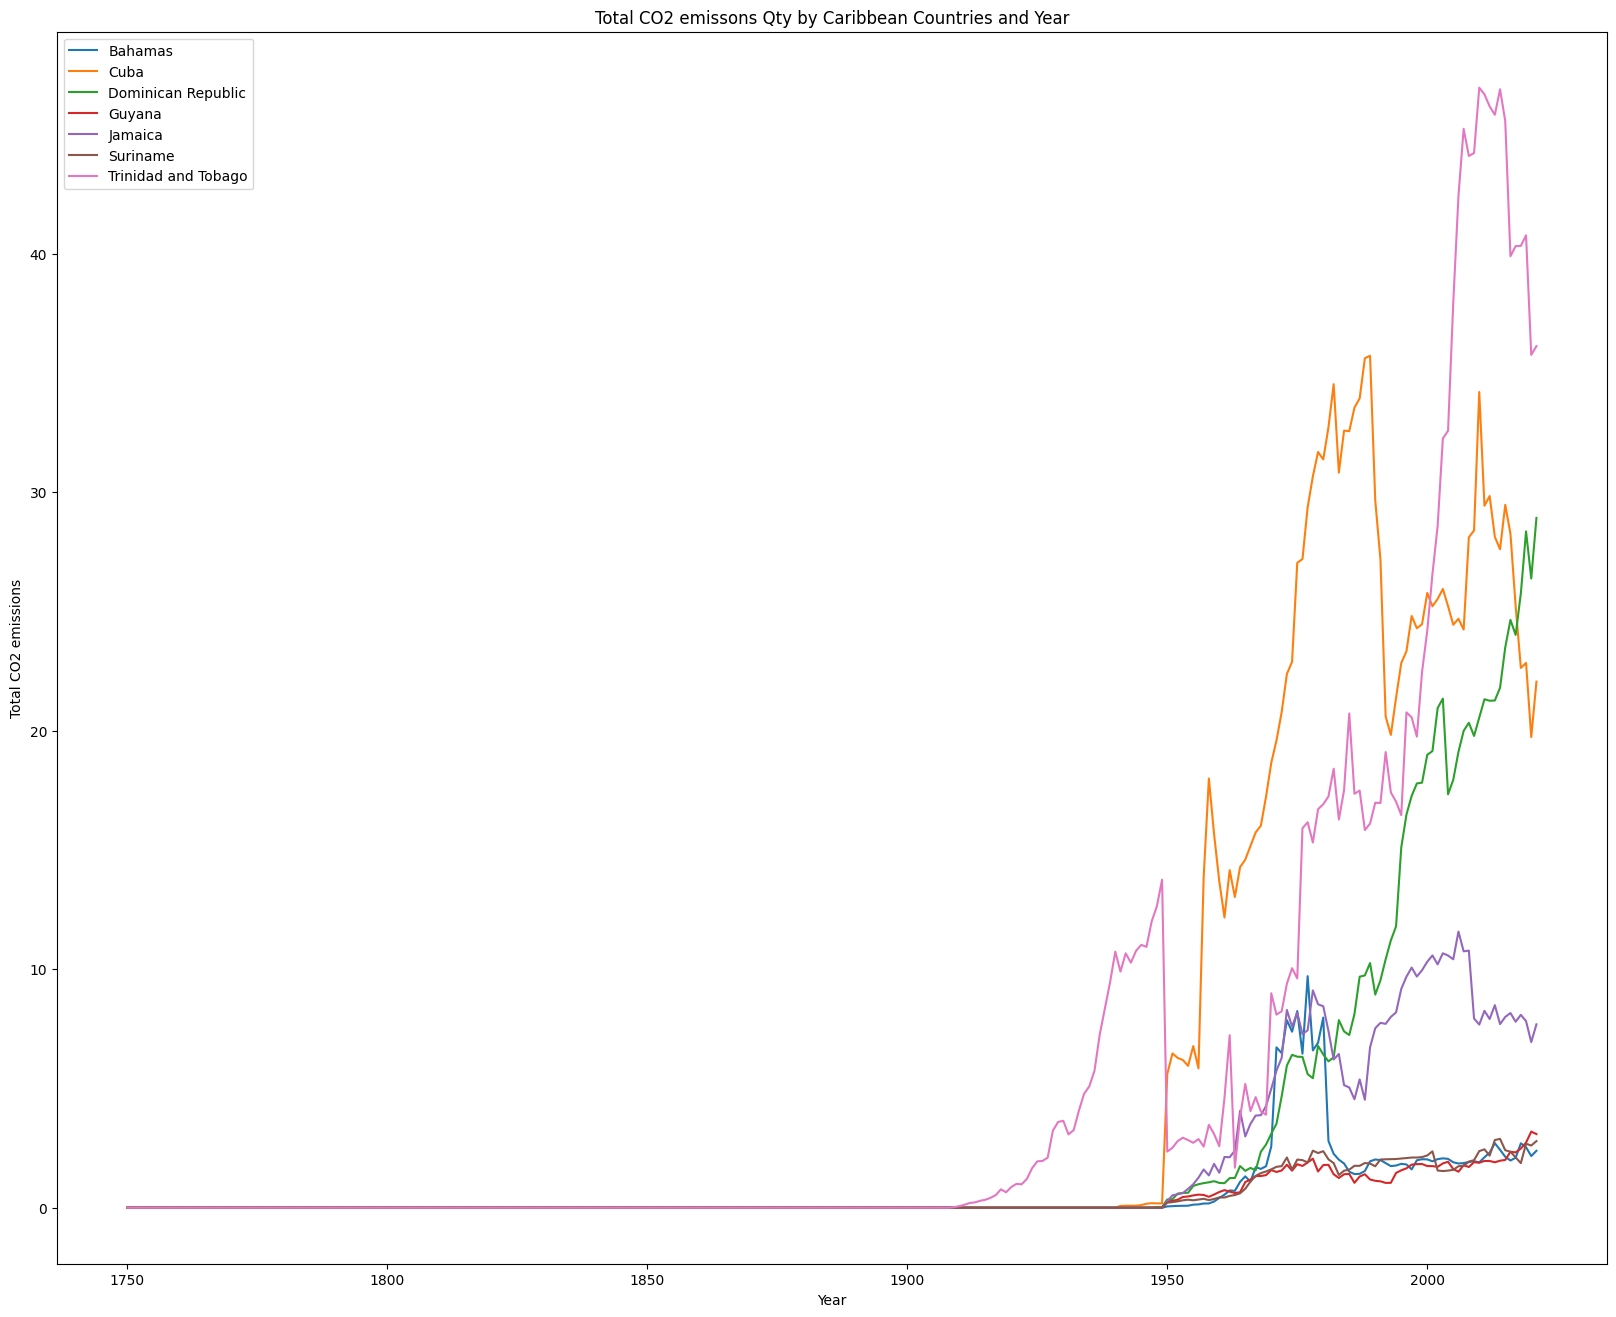

In [76]:
plt.figure(figsize=(20,16))
# create a DataFrame from the data

df = filtered_co2[filtered_co2['Country'].isin(['Cuba','Trinidad and Tobago', 'Dominican Republic','Jamaica','Bahamas','Suriname','Guyana'])]
# group the data by country
grouped = df.groupby("Country")

# plot the line graph for each country
for name, group in grouped:
    plt.plot(group['Year'], group['Total'], label=name)

# add a title, x-axis label, and y-axis label
plt.title('Total CO2 emissons Qty by Caribbean Countries and Year')
plt.xlabel('Year')
plt.ylabel('Total CO2 emissions')

# add a legend
plt.legend()

# show the plot
plt.show()

### What percentage of total emission does the top 10 polluters make up vs how much the Caribbean region ?

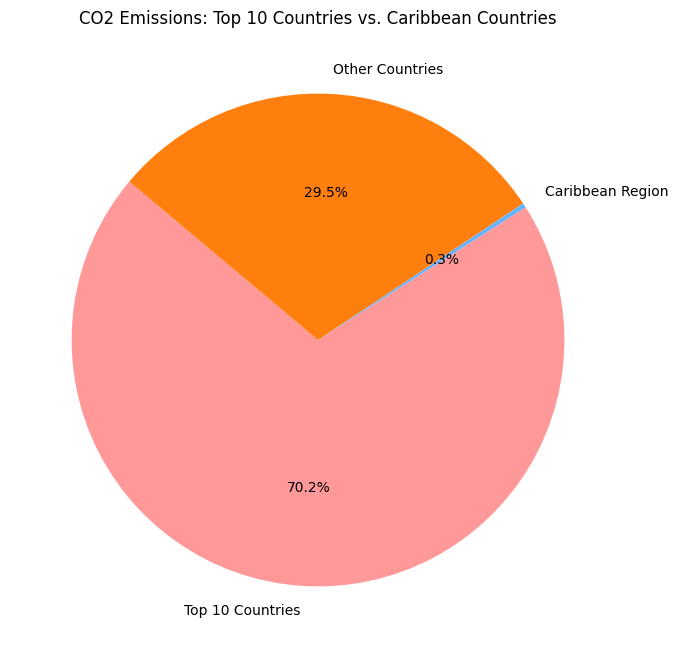

In [75]:
top_to_country_total_sum = top_10_country_total.sum()
caribbean_countries_sum = caribbean_countries['Total'].sum()
total_countries_sum = filtered_co2['Total'].sum()

other_countries_sum = total_countries_sum - top_to_country_total_sum - caribbean_countries_sum

labels = ['Top 10 Countries', 'Caribbean Region', 'Other Countries']
sizes = [top_to_country_total_sum, caribbean_countries_sum, other_countries_sum]

# Define colors
colors = ['#ff9999','#66b3ff','#ff7f0e']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('CO2 Emissions: Top 10 Countries vs. Caribbean Countries')
plt.show()

### What Percentage of emission does Oil, Gas  and Coal Production make based on the Top ten polluters ? 

In [71]:
top_10_countries = filtered_co2[filtered_co2['Country'].isin([
    'USA', 'China', 'Russia','Germany', 'United Kingdom',
    'Japan', 'India', 'France', 'Canada', 'Ukraine'

   
])]


top_10_countries_Oil_total = top_10_countries['Oil'].sum()
top_10_countries_Gas_total = top_10_countries['Gas'].sum()
top_10_countries_Coal_total = top_10_countries['Coal'].sum()
top_10_countries_total = top_10_countries['Total'].sum()
top_10_countries_other_total = top_10_countries_total  - top_10_countries_Coal_total - top_10_countries_Gas_total - top_10_countries_Oil_total


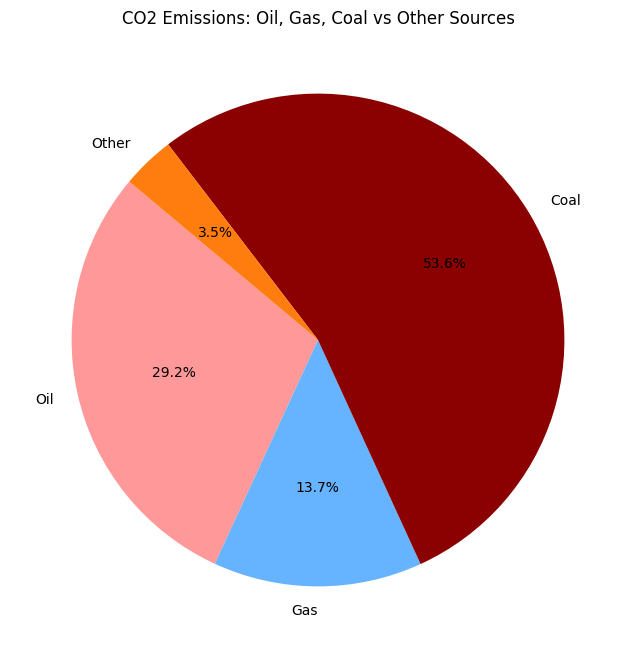

In [77]:
labels = ['Oil', 'Gas', 'Coal', 'Other']
sizes = [
    top_10_countries_Oil_total,
    top_10_countries_Gas_total,
    top_10_countries_Coal_total,
    top_10_countries_other_total      
    ]

# Define colors
colors = ['#ff9999','#66b3ff','#8B0000', '#ff7c0e']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('CO2 Emissions: Oil, Gas, Coal vs Other Sources')
plt.show()

## Summary of Findings 

#### Top 10 Cumulative Polluters Globally

1. USA
2. China
3. Russia
4. Germany
5. United Kingdom
6. Japan
7. India
8. France
9. Canada
10. Ukraine

#### Top 10 Cumulative Polluters in the caribbean region

1. Cuba
2. Trinidad and Tobago
3. Dominican Republic
4. Jamaica
5. Bahamas
6. Suriname
7. Guyana
8. Haiti
9. Aruba
10. Barbados 


#### How has the Top 10 polluters CO2 emission change between 1750 - 2021

Based on Total emissions vs year graph we see most of the countries on the list have shown consistant emissions from since the 2000's. On the other hand the USA which is highest cumulative polluter has been declining, while China and India have been rapidly increasing in their CO2 emissions, with china currently being the largest CO2 polluters currently 

#### How has the Top 10 Caribbean polluters CO2 emission change between 1750 - 2021

Based on Total emissions vs year graph we see most of the caribbean countries on the list have shown consistant emissions since the 2000's. While Cuba and Trinidad and Tobago have been CO2 emission have been decreasing. However The Dominican Republic's emissions have been rapidly increasing for said timeframe.


#### How much emissions has the the top 10 polluters vs the carribbean region contributed to total global emissions ?

- Top 10 Countries = 70.2%
- Caribbean =  0.3%


#### What Activities Contribute mostly to CO2 emission from the top 10 polluters

- Coal Production = 53.6%
- Oil Production = 29.2%
- Gas Production = 13.7%
